In [1]:
# Import necessary libraries
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [2]:
# Load the image (adjust the file path to your image)
image_path = '/content/drive/MyDrive/Colab Notebooks/Tut 8/fruits.jpg'
image = cv2.imread(image_path)

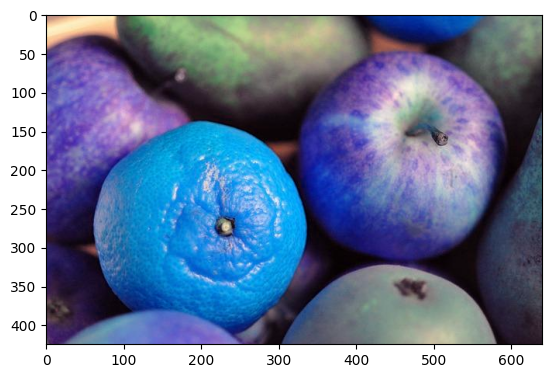

In [3]:
plt.imshow(image)
plt.show()

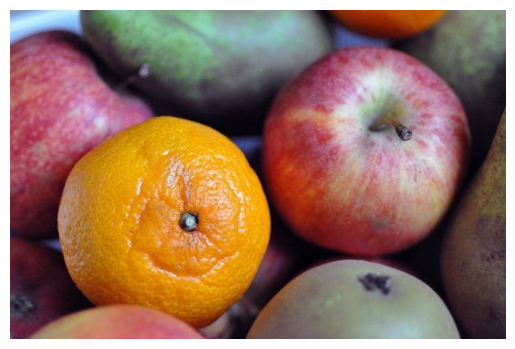

In [4]:
# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

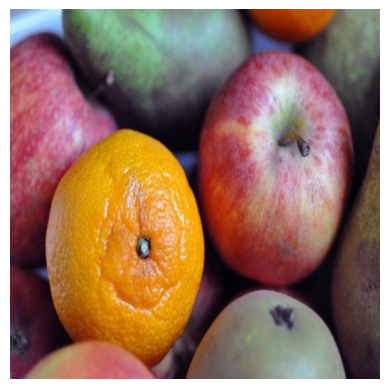

In [5]:
# Resize the image to 500x500 pixels
resized_image = cv2.resize(image_rgb, (500, 500))

# Save the preprocessed image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Tut 8/resized_image.jpg', resized_image)

# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis('off')
plt.show()

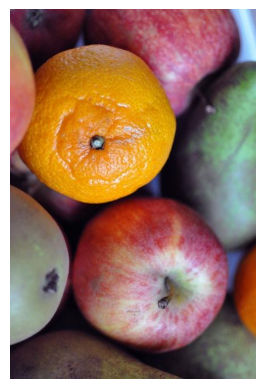

In [6]:
# Rotate the image (90 degrees clockwise)
rotated_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Save the rotated image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Tut 8/rotated_image_90.jpg', rotated_image_90)

# Display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis('off')
plt.show()

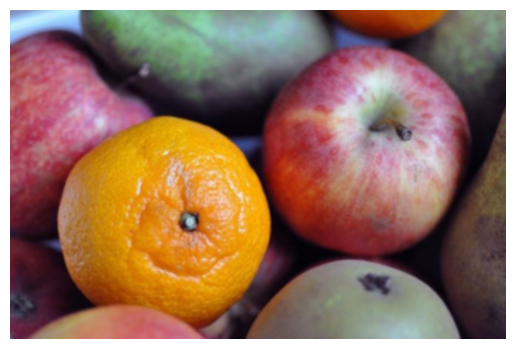

In [7]:
# Denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the denoised image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Tut 8/denoised_image.jpg', denoised_image)

# Display the denoised image using matplotlib
plt.imshow(denoised_image)
plt.axis('off')
plt.show()

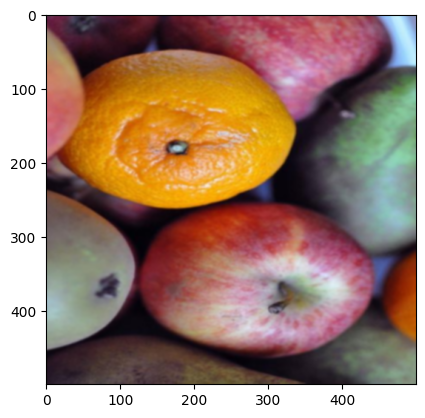

In [8]:
#apply resizing, rotation and denoising to the image and save it as processed image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Tut 8/fruits.jpg')

# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#resize thesame image to 500x500 pixel
image_rgb = cv2.resize(image_rgb, (500, 500))

# Rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Denoise the image using Gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the processed image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Tut 8/processed_image.jpg', image_rgb)

# Display the denoised image using matplotlib
plt.imshow(image_rgb)

plt.axis()
plt.show()

In [9]:
#metadata for the processed fruit image
metadata = {
    "/content/drive/MyDrive/Colab Notebooks/Tut 8/processed_image.jpg": {
        "keywords": ["Fruits", "Healthy food", "green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }

    }

In [10]:
# Save metadata to a JSON file
with open('/content/drive/MyDrive/Colab Notebooks/Tut 8/image_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)

In [11]:
processed_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Tut 8/processed_image.jpg')

In [12]:
# Calculate mean and norm of pixel intensities
mean_intensity = np.mean(processed_image)
norm_intensity = np.linalg.norm(processed_image)

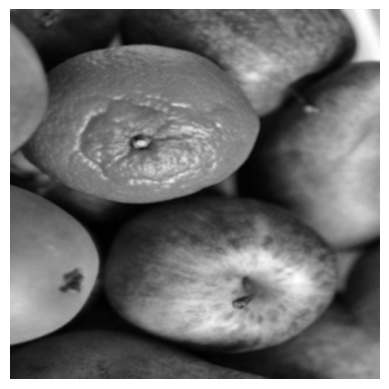

In [13]:
# Convert to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

In [15]:
# Find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
# Iterate through each contour to calculate the shape features
for contour in contours:
    # Area
    area = cv2.contourArea(contour)

    # Perimeter (arc length)
    perimeter = cv2.arcLength(contour, True)  # True means the contour is closed

    # Centroid (center of mass)
    moments = cv2.moments(contour)
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
    else:
      cx, cy = 0, 0

    # Bounding box (smallest rectangle that contains the object)
    x, y, w, h = cv2.boundingRect(contour)

    # Print the shape features
    print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({cx}, {cy}), Bounding Box: ({x}, {y}), Width: {w}, Height: {h}")

Area: 7.0, Perimeter: 27.798989176750183, Centroid: (323, 395), Bounding Box: (319, 392), Width: 11, Height: 9
Area: 18.5, Perimeter: 115.154327750206, Centroid: (308, 398), Bounding Box: (300, 386), Width: 23, Height: 20
Area: 14.0, Perimeter: 106.9116872549057, Centroid: (77, 375), Bounding Box: (67, 367), Width: 26, Height: 16
Area: 7.5, Perimeter: 64.87005710601807, Centroid: (321, 363), Bounding Box: (313, 361), Width: 18, Height: 16
Area: 4.5, Perimeter: 21.55634880065918, Centroid: (95, 358), Bounding Box: (92, 355), Width: 7, Height: 8
Area: 6.5, Perimeter: 66.66904664039612, Centroid: (82, 354), Bounding Box: (72, 350), Width: 21, Height: 17
Area: 101.5, Perimeter: 738.849847316742, Centroid: (84, 342), Bounding Box: (0, 237), Width: 121, Height: 218
Area: 4.5, Perimeter: 69.69848430156708, Centroid: (189, 232), Bounding Box: (171, 230), Width: 31, Height: 5
Area: 33.5, Perimeter: 24.727921843528748, Centroid: (163, 233), Bounding Box: (160, 230), Width: 8, Height: 8
Area: 4.0

In [17]:
# Collect all the shape features as a dictionary
shape_feature = {
    "area": area,
    "perimeter": perimeter,
    "centroid": (cx, cy),
    "bounding_box": (x, y, w, h)
}

In [18]:
# Collect all the features extracted from the processed_image and store as a meta data
features_extracted = {
    "mean_intensity": mean_intensity,  # Mean intensity calculated earlier
    "norm_intensity": norm_intensity,  # Norm intensity calculated earlier
    "shape_features": shape_feature  # List to hold shape features for each object
}

In [19]:
# Collect all the shape features as a dictionary
shape_feature = {
    "area": area,
    "perimeter": perimeter,
    "centroid": (cx, cy),
    "bounding_box": (x, y, w, h)
}


In [20]:
# Collect all the features extracted from the processed_image and store as a meta data
features_extracted = {
    "mean_intensity": mean_intensity,  # Mean intensity calculated earlier
    "norm_intensity": norm_intensity,  # Norm intensity calculated earlier
    "shape_features": shape_feature  # List to hold shape features for each object
}

In [21]:
# Save the features to a JSON file
with open('/content/drive/MyDrive/Colab Notebooks/Tut 8/image_features.json', 'w') as json_file:
    import json
    json.dump(features_extracted, json_file, indent=4)

In [22]:
#import necessary library
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
# Load the content of the specified file
with open('/content/drive/MyDrive/Colab Notebooks/Tut 8/101551') as file:
    document_101551 = file.read()

In [25]:
document_sample = document_101551[621:-15]

In [26]:
print(document_sample)

:
|> : 	I have been active in defending Saturn lately on the net and would
|> : like to state my full opinion on the subject, rather than just reply to others'
|> : points.
|> : 	
|> : 	The biggest problem some people seem to be having is that Saturn
|> : Dealers make ~$2K on a car.  I think most will agree with me that the car is
|> : comparably priced with its competitors, that is, they aren't overpriced 
|> : compared to most cars in their class.  I don't understand the point of 
|> : arguing over whether the dealer makes the $2K or not?  
|> 
|> I have never understood what the big deal over dealer profits is either.
|> The only thing that I can figure out is that people believe that if
|> they minimize the dealer profit they will minimize their total out-of-pocket
|> expenses for the car. While this may be true in some cases, I do not
|> believe that it is generally true. I bought a Saturn SL in January of '92.
|> AT THAT TIME, based on studying car prices, I decided that there wa

In [27]:
# Text Normalization: Convert document_101551 to lowercase and rename as document_101551_lower
document_sample_lower = document_sample.lower()

In [28]:
# Tokenization: Split document_101551_lower into words
tokens = word_tokenize(document_sample_lower)

In [29]:
# Removal of punctuation
tokens = [word for word in tokens if word not in string.punctuation]

In [30]:
# Removal of stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [31]:
# Print the preprocessed tokens
print("Preprocessed Tokens:", tokens)

Preprocessed Tokens: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'points', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealers', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitors', "n't", 'overpriced', 'compared', 'cars', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'makes', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expenses', 'car', 'may', 'true', 'cases', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'prices', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expenses', 'would', "n't", 'different', "'s", 'important', 'much

In [32]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming to the tokens
stemmed_words = [stemmer.stem(word) for word in tokens]

# Print the stems from the tokens
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['activ', 'defend', 'saturn', 'late', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'repli', 'other', 'point', 'biggest', 'problem', 'peopl', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agre', 'car', 'compar', 'price', 'competitor', "n't", 'overpr', 'compar', 'car', 'class', "n't", 'understand', 'point', 'argu', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figur', 'peopl', 'believ', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', 'expens', 'car', 'may', 'true', 'case', 'believ', 'gener', 'true', 'bought', 'saturn', 'sl', 'januari', "'92", 'time', 'base', 'studi', 'car', 'price', 'decid', 'compar', 'car', 'price', 'cheapli', 'saturn', 'sure', 'mayb', 'could', 'talk', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expens', 'would', "n't", 'differ', "'s", 'import', 'much', 'money', 'left', 'buy', 'car', 'reduc', 'dealer', 'profit', 'thing', 'sa

In [33]:
# Apply lemmatization to the tokens
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

# Print the lemma from the tokens
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'point', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitor', "n't", 'overpriced', 'compared', 'car', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expense', 'car', 'may', 'true', 'case', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'price', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expense', 'would', "n't", 'different', "'s", 'important', 'much', 'money', '

In [34]:
# Metadata about the vectorization process
metadata = {
    "vectorization_methods": {
        "bag_of_words": "Each word in the corpus is treated as a feature, and the text is represented by a count of each word.",
        "tf-idf": "Each word in the corpus is weighted based on its frequency in the document and its inverse frequency across all documents."
    },
    "document_summary": "This is a summary of the text data preprocessing and vectorization for document 101551.",
    "sentiment_label": "neutral"  # You can update this label based on your analysis
}

In [35]:
# Save metadata to a JSON file
with open('text_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)

In [37]:
from PIL import Image
import numpy as np

from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

im_frame = Image.open('/content/drive/MyDrive/Colab Notebooks/Tut 8/fruits.jpg')
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)  # 'Your_2D_np_array'

# Generate GLCM
distances = [50]  # Offset
angles = [np.pi/2]  # Vertical Direction
glcm = graycomatrix(image, distances=distances, angles=angles, levels=256)

# Calculate Features from GLCM
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')